# House Prices
House Prices: Advanced Regression Techniques<BR>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview


In [2]:
%%time
import os
!kaggle competitions list
!kaggle competitions download -c house-prices-advanced-regression-techniques

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         22           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        267           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2852           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      21731           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       5141            True  
connectx                                       2030-01-01 00:00:00  Getting Started  Knowledge        861           False  
nlp-gett

# データの情報

In [17]:
#データの読み込み
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [18]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [20]:
print(train.shape)
print(train.dtypes)
print("元データのtrainの欠損値")
print(train.isnull().sum())
print("元データのtestの欠損値")
print(test.isnull().sum())

(1460, 81)
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt   

# 前処理
n段階評価のものはn,n-1,...,1(,0)に直す(nanは0に)<br>
あり・なしのものは1・0に直す(nanは0に)<br>
欠損値を平均値で埋める

In [21]:
import preprocesses
import numpy as np

In [22]:
new_train=train[preprocesses.train_valiable_list]
new_test=test[preprocesses.test_valiable_list]
new_train=preprocesses.preprocess(new_train)
new_test=preprocesses.preprocess(new_test)
new_train["SalePrice"]=np.log(new_train["SalePrice"])

/Users/Naomi/Desktop/git_clones/MachineLearning/House_Prices/preprocesses.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  t[k]= t[k].map(five_map1)
/Users/Naomi/Desktop/git_clones/MachineLearning/House_Prices/preprocesses.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  t["BsmtExposure"]= t["BsmtExposure"].map(five_map2)
/Users/Naomi/Desktop/git_clones/MachineLearning/House_Prices/preprocesses.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [23]:
new_train.head(5)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,YrSold,SalePrice,Baths
0,65.0,8450,7,5,2003,2003,196.0,4,3,4,...,61,0,0,0,0,0,0,2008,12.247694,4
1,80.0,9600,6,8,1976,1976,0.0,3,3,4,...,0,0,0,0,0,0,0,2007,12.109011,3
2,68.0,11250,7,5,2001,2002,162.0,4,3,4,...,42,0,0,0,0,0,0,2008,12.317167,4
3,60.0,9550,7,5,1915,1970,0.0,3,3,3,...,35,272,0,0,0,0,0,2006,11.849398,2
4,84.0,14260,8,5,2000,2000,350.0,4,3,4,...,84,0,0,0,0,0,0,2008,12.429216,4


# データの分析
ヒストグラム、ヒートマップなどを表示する。

<AxesSubplot:>

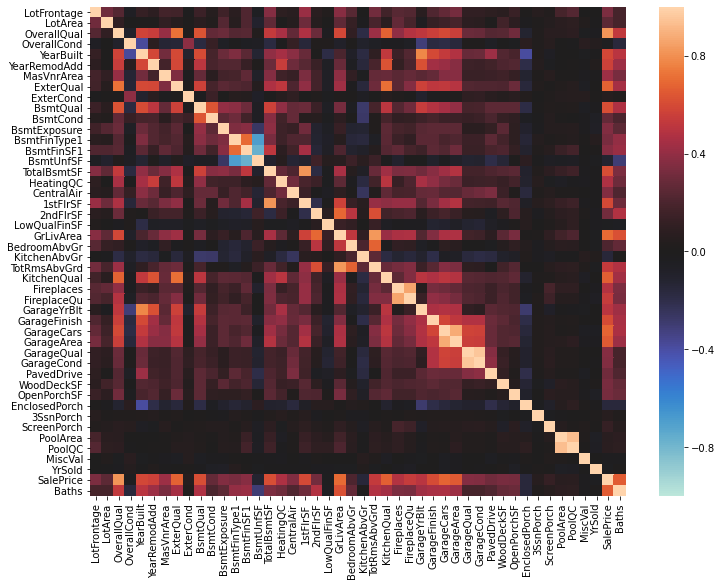

In [24]:
#ヒートマップの表示
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 9)) 
corr=new_train.corr()
sns.heatmap(corr, vmax=1, vmin=-1, center=0)

PoolAreaとPoolQCやGarageAreaとGarageQualなどに相関があるようだ。
広いプールは質も良さそうなので妥当に見える。

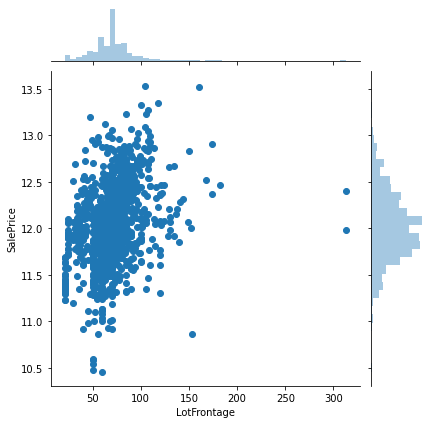

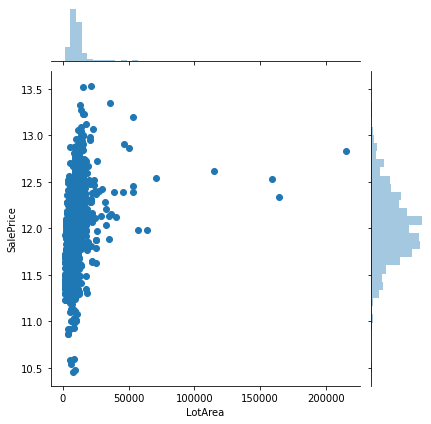

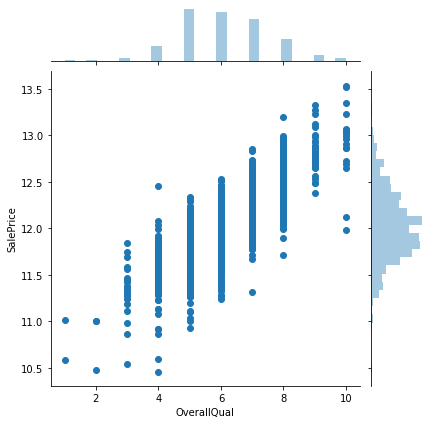

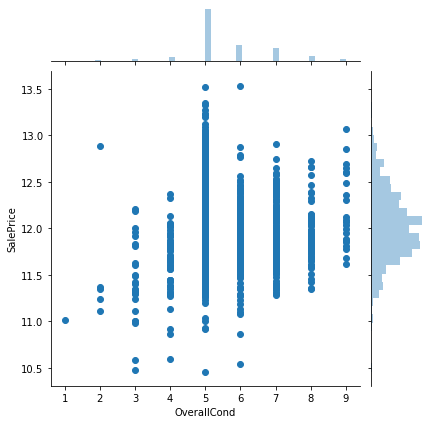

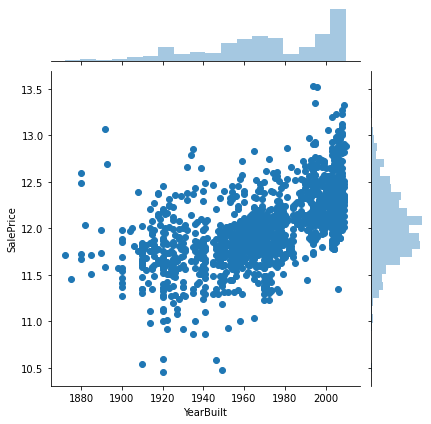

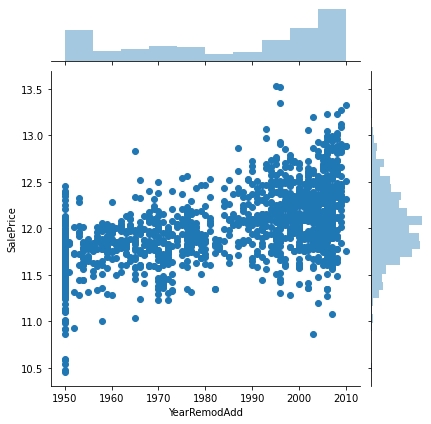

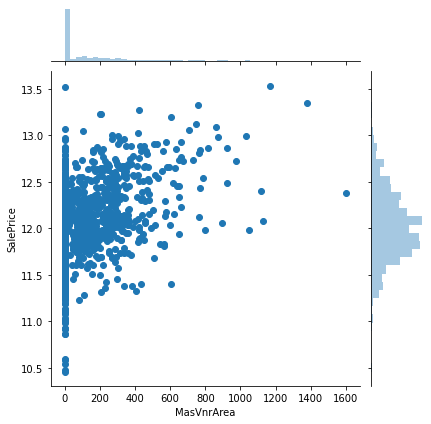

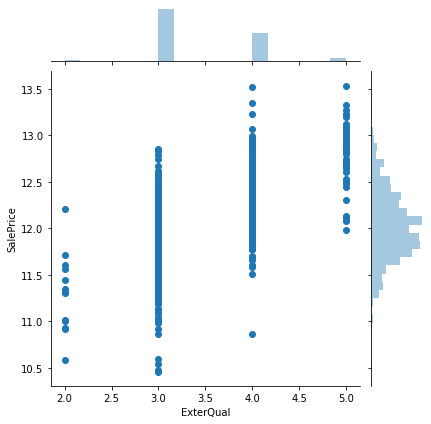

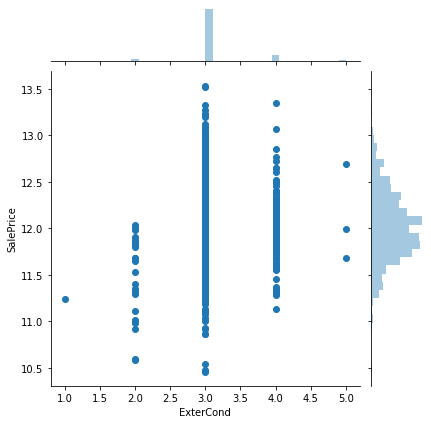

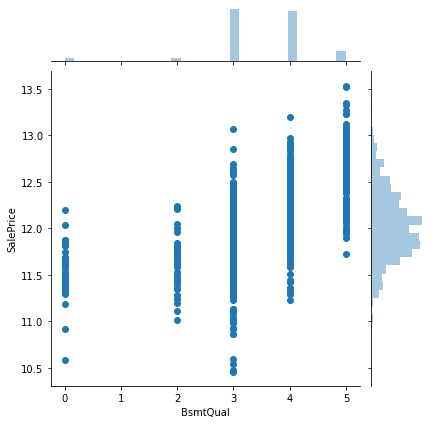

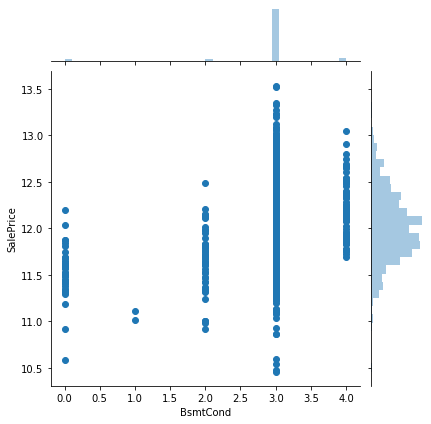

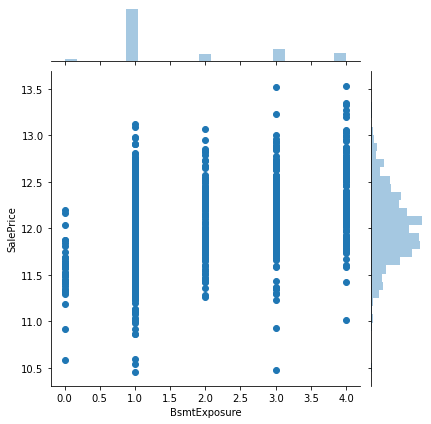

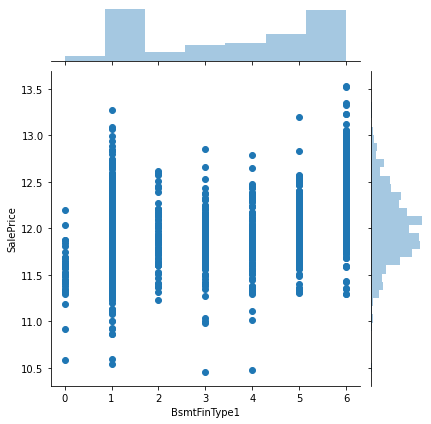

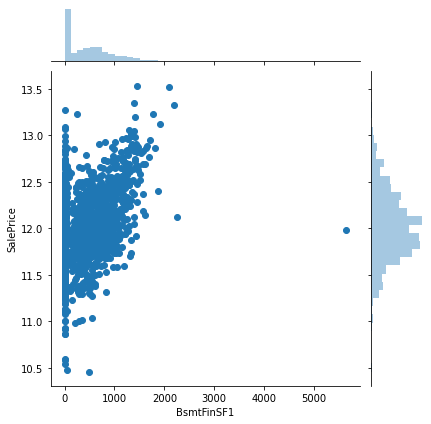

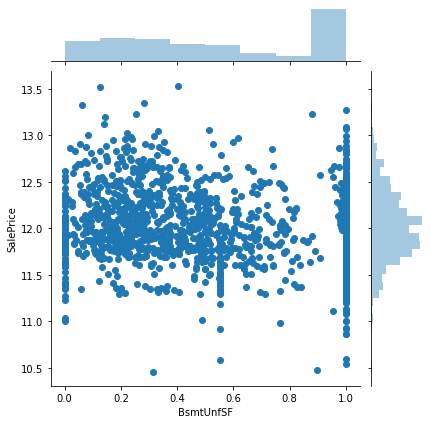

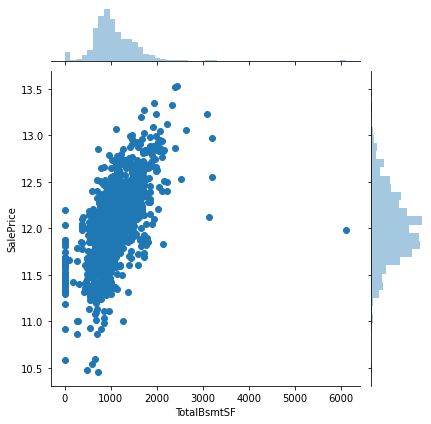

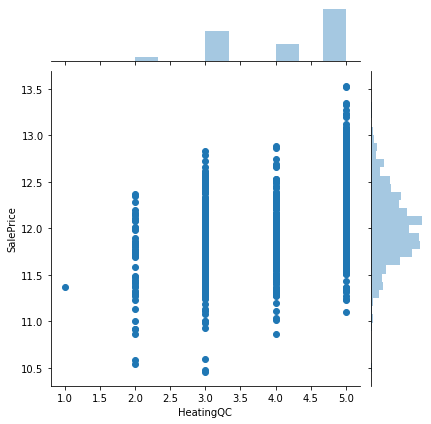

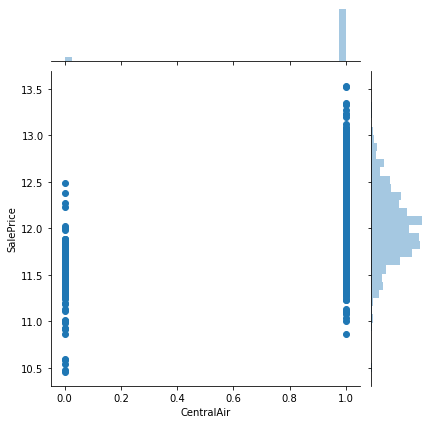

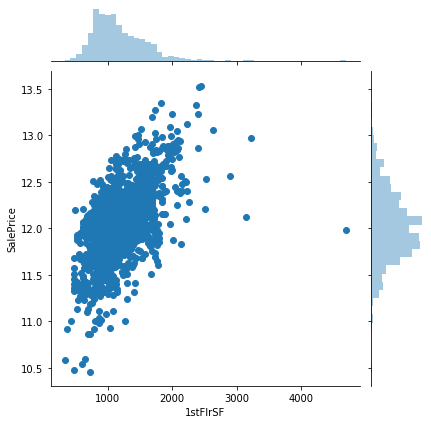

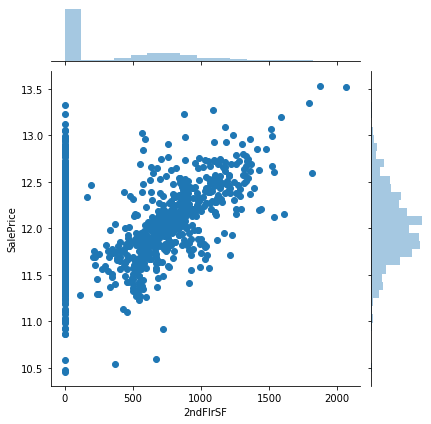

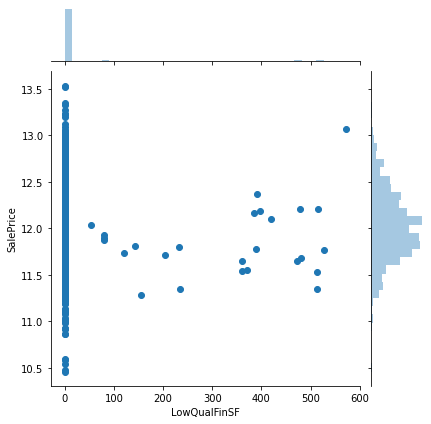

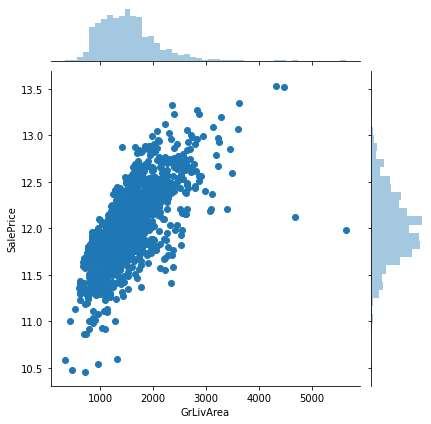

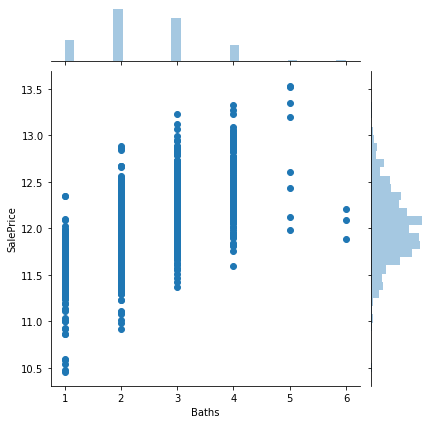

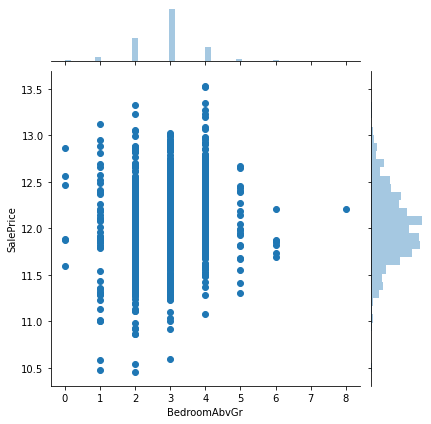

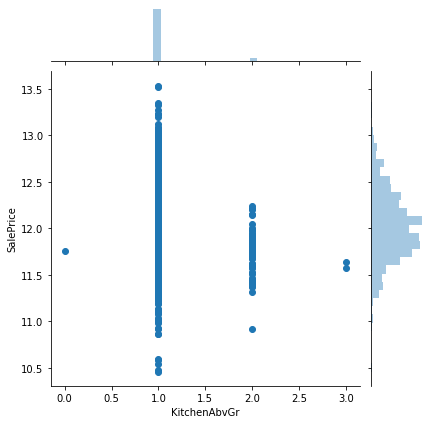

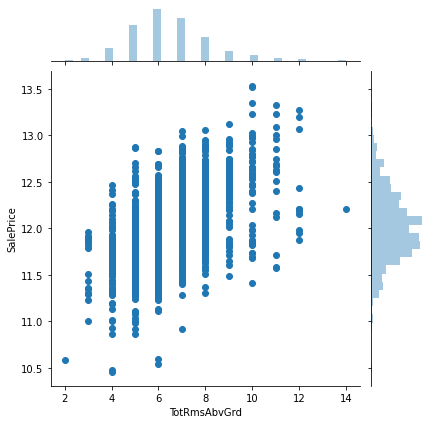

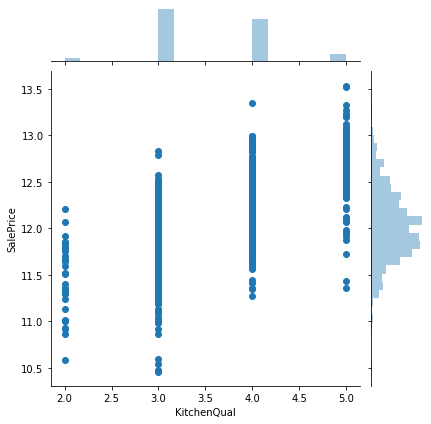

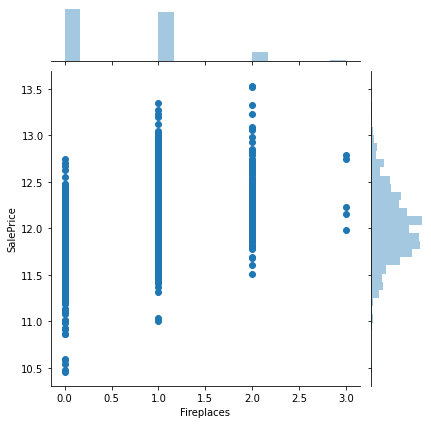

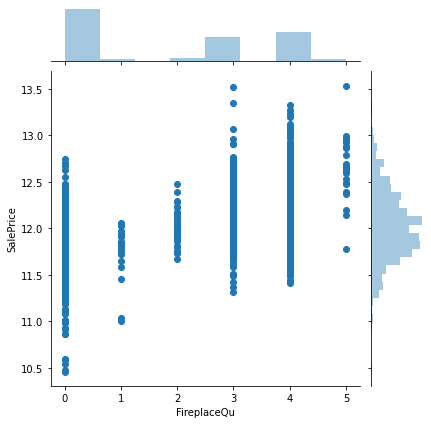

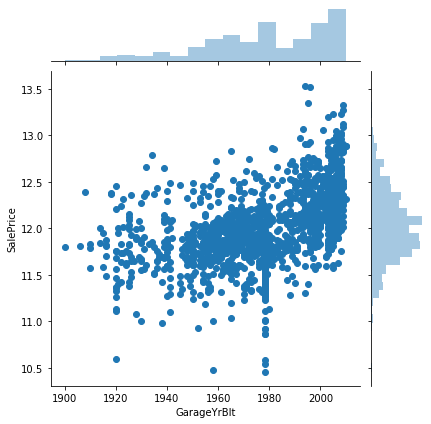

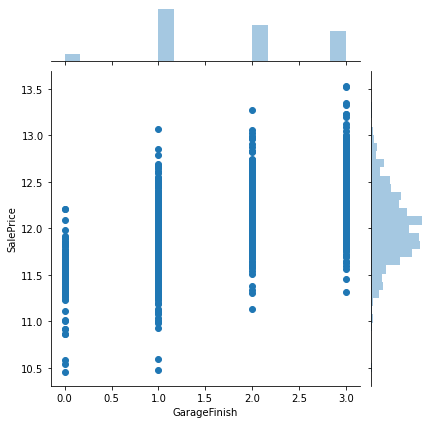

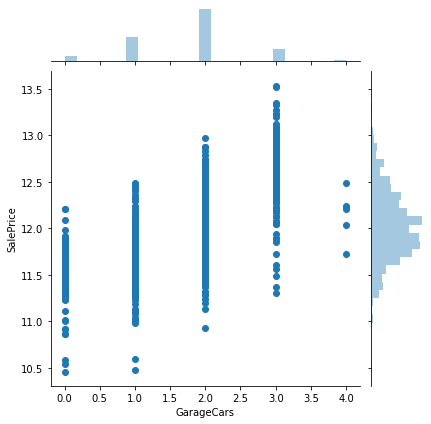

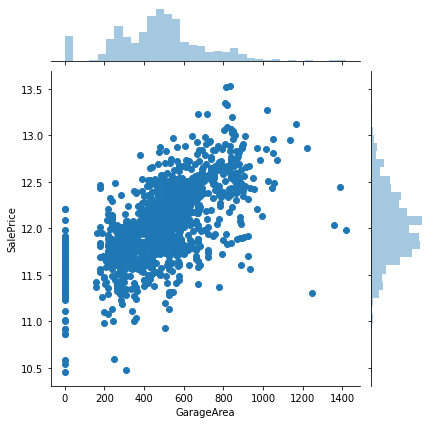

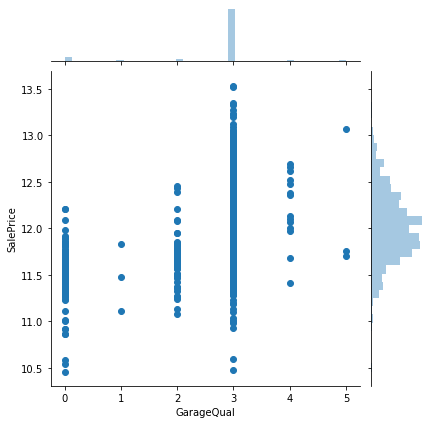

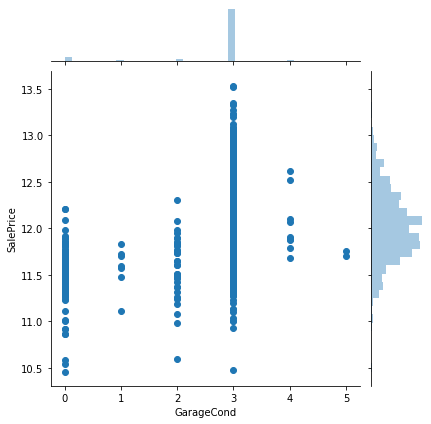

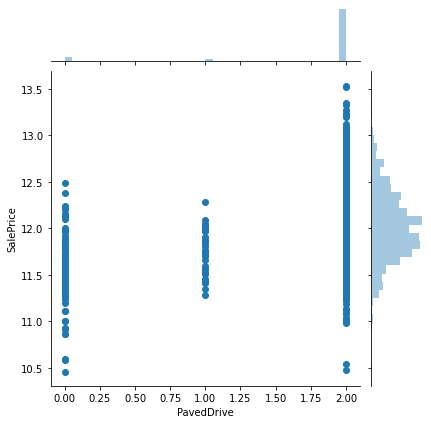

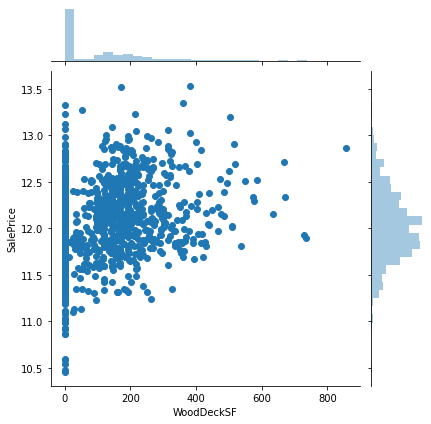

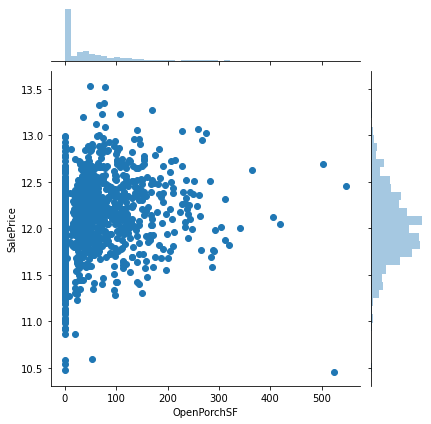

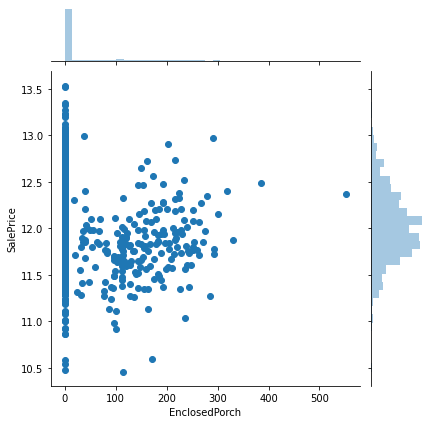

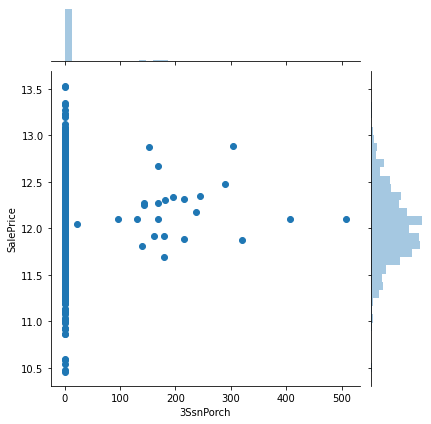

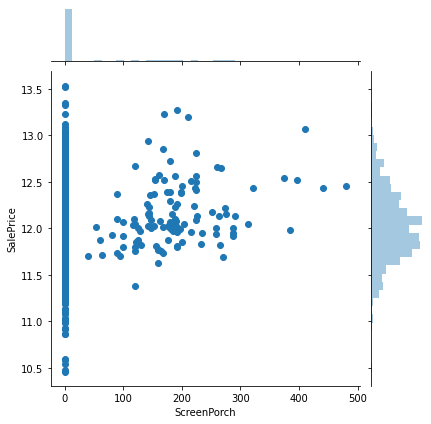

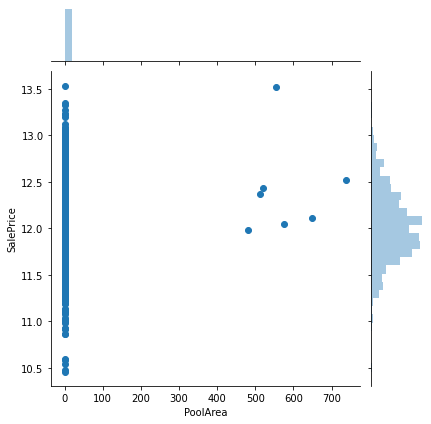

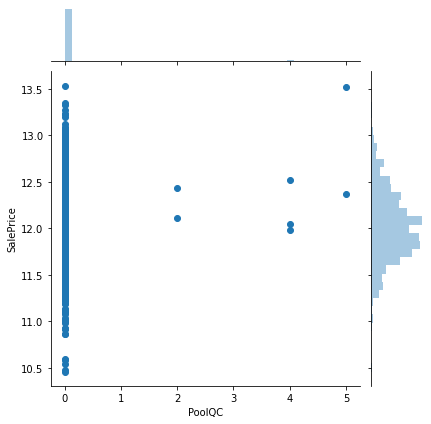

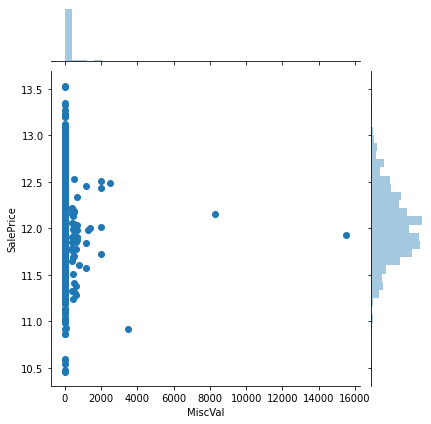

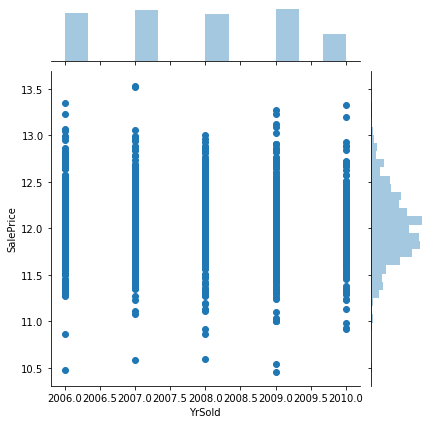

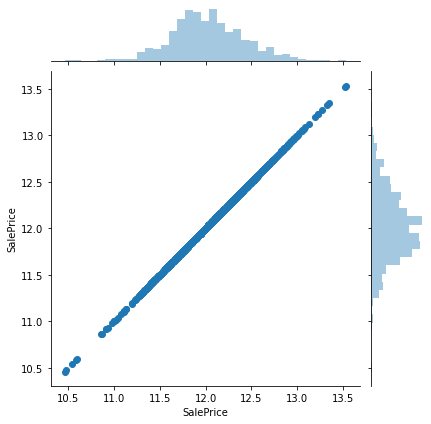

In [25]:
for i in preprocesses.new_train_valiable_list:
    sns.jointplot(new_train[i],new_train["SalePrice"])

# 学習させる
訓練データ(new_train)を4:1で訓練・バリデーションに使う<br>
交差検証を行う
## 精度評価

kaggleでは予測結果と正解のそれぞれlogを取ったもののRMSE(root mean squared error)を用いている。おそらくRMSLEと呼ばれるものである、$RMSLE=\sqrt{\frac{1}{n} \sum_{i=1}^{n}\left(\log \left(y_{i}+1\right)-\log (\hat{y}+1)\right)^{2}}$。性能評価実験でもこれを用いる。(予測が負にならないようにするのは大変難しいので、SalePriceのlogを予測するモデルとした。)<BR>
他にもこのような指標が使える:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

 # おまけ
 kaggleに提出してみる用の実行セル

In [226]:
model = Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', LinearRegression())])
model.fit(new_train.drop(["SalePrice"],axis=1), new_train["SalePrice"])

# make predictions
yt =model.predict(new_test)
output_df=new_test.copy()
output_df["SalePrice"] = yt
output_df["Id"]=test["Id"]
output_df.to_csv("output.csv",index=False, columns=['Id','SalePrice'])

In [227]:
#kaggleに提出してみる
!head output.csv

Id,SalePrice
1461,116541.9437241467
1462,166960.04992219468
1463,167776.27180824184
1464,193672.8711566705
1465,203534.2194512164
1466,163350.01438311604
1467,173690.65631209582
1468,153775.58886186464
1469,201644.37133747118


In [228]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f output.csv -m  "test" 

100%|██████████████████████████████████████| 33.6k/33.6k [00:02<00:00, 12.0kB/s]
Successfully submitted to House Prices: Advanced Regression Techniques